### **Ejercicio N°2**

El dataset `alimentos.csv` fue elaborado por una clínica de nutrición que suministró a sus pacientes una lista de alimentos permitidos con sus respectivos contenidos calóricos. También se detalló el tipo de alimento del que se trataba (fruta, verdura, etc.) y el tipo de vitamina que aportaba cada uno (A, B o C).

Por otra parte, la nutricionista a cargo del estudio lleva una planilla de control de la evolución de 50 pacientes (`pacientes.csv`) en la que registra la edad, el sexo, la altura, el peso inicial y el peso final de cada uno de ellos luego de seguir un plan de dieta por una cierta cantidad de tiempo, información que también fue registrada en el campo “tiempo de tratamiento”.

1. Importe ambos datasets al entorno de trabajo y realice cualquier tarea de limpieza y/o
adecuación de los mismos que considere necesaria.

2. En relación al campo `aporte_calorico_kcal` informe las medidas descriptivas que le brinden información sobre los siguientes aspectos:

- Las kcal que aportan, en promedio, los alimentos que forman parte del dataset.
- Aquel valor de aporte calórico tal que el 50% de los alimentos del dataset presentan aportes calóricos menores o iguales a él.
- La dispersión o variabilidad del 50% central de las observaciones.
- El o los valores que se presentan con mayor frecuencia entre las observaciones.

3. Represente la distribución de las observaciones de la variable `aporte_calorico_kcal` a través de un boxplot.

- Identifique en el gráfico la mediana, el primer y el tercer cuartil.
- ¿Cómo caracterizaría a la distribución en relación a sus características de simetría?
- En función a lo observado, ¿qué par de medidas de centralidad/posición (media aritmética - mediana) y de dispersión (rango intercuartil - rango - desviación estándar) le parece más adecuada para describir a este conjunto?
- ¿Existe alguna observación que pueda ser considerada como atípica? En caso de respuesta
afirmativa, ¿cuántas observaciones recibirían esta calificación?

4. ¿Qué tipo de alimento presenta la mayor mediana de aporte calórico?

5. Realice un boxplot para representar la distribución de los aportes calóricos de alimentos de los siguientes tipos: frutas, verduras y alimentos elaborados.
- ¿Qué tipo de alimentos presenta valores calóricos más variables y cuál menos variables?
- ¿Qué medida descriptiva utilizó para responder a estas últimas preguntas?

6. Utilizando los datos de los/las pacientes, genere una variable que corresponda a la variación de peso para cada paciente a lo largo del tratamiento (`peso_final_kg` - `peso_inicial_kg`).
- Represente los valores observados de la variable “diferencia de peso” en función del sexo a través de un boxplot.
- ¿Qué medida descriptiva utilizaría para comparar los resultados del tratamiento entre personas de ambos sexos? En función de su respuesta, ¿las personas de qué sexo obtuvieron los mejores resultados para el tratamiento?



In [ ]:
import pandas as pd
alimentos = pd.read_csv("/content/alimentos.csv", sep=";", encoding="latin1")
pacientes = pd.read_csv("/content/pacientes.csv", sep=";", encoding="latin1")

In [ ]:
alimentos.describe()

,aporte_calorico_kcal
count,99.000000
mean,124.505051
std,185.313709
min,0.000000
25%,31.500000
50%,66.000000
75%,93.500000
max,954.000000


In [ ]:
alimentos.dtypes

,0
alimento,object
aporte_calorico_kcal,int64
tipo_de_alimento,object
vitamina,object


In [ ]:
pacientes.describe()

,codigo_paciente,peso_inicial_kg,peso_final_kg,tiempo_tratamiento_dias
count,50.00000,50.000000,50.000000,50.000000
mean,398935.50000,72.420000,67.580000,337.960000
std,14.57738,14.690119,12.145529,201.626343
min,398911.00000,48.000000,48.000000,30.000000
25%,398923.25000,60.500000,58.500000,185.750000
50%,398935.50000,75.500000,67.500000,334.500000
75%,398947.75000,85.000000,79.750000,481.250000
max,398960.00000,97.000000,93.000000,707.000000


In [ ]:
pacientes.head()

,codigo_paciente,peso_inicial_kg,peso_final_kg,altura_m,sexo,tiempo_tratamiento_dias
0,398911,78,72,"1,8",F,583
1,398912,68,68,"1,75",F,159
2,398913,92,70,"1,85",F,70
3,398914,66,64,"1,65",M,41
4,398915,51,50,"1,55",F,30


In [ ]:
pacientes.dtypes

,0
codigo_paciente,int64
peso_inicial_kg,int64
peso_final_kg,int64
altura_m,object
sexo,object
tiempo_tratamiento_dias,int64


In [ ]:
# con esto se verifica si hay valores nulos en las columnas involucradas


print(alimentos.isnull().sum(),
      pacientes.isnull().sum())


alimento                0
aporte_calorico_kcal    0
tipo_de_alimento        0
vitamina                0
dtype: int64 codigo_paciente            0
peso_inicial_kg            0
peso_final_kg              0
altura_m                   0
sexo                       0
tiempo_tratamiento_dias    0
dtype: int64


In [ ]:
# limpieza de altura cambiando las comas por puntos y pasando la variable a float (numérico)
pacientes["altura_m"] = (pacientes["altura_m"]
                         .astype(str)
                         .str
                         .replace(",", ".")
                         # .replace("nan", pd.NA) *revisé que no hay valores nan (string) pero así se cambiaría
                         .astype(float)
)

In [ ]:
#pacientes
pacientes.dtypes
# pacientes.shape
#pacientes.describe(include='all')

# alimentos.head(7)
# alimentos.dtypes
# alimentos.shape
# alimentos.describe(include='all')

,0
codigo_paciente,int64
peso_inicial_kg,int64
peso_final_kg,int64
altura_m,float64
sexo,object
tiempo_tratamiento_dias,int64


2. En relación al campo `aporte_calorico_kcal` informe las medidas descriptivas que le brinden información sobre los siguientes aspectos:

- Las kcal que aportan, en promedio, los alimentos que forman parte del dataset.
- Aquel valor de aporte calórico tal que el 50% de los alimentos del dataset presentan aportes calóricos menores o iguales a él.
- La dispersión o variabilidad del 50% central de las observaciones.
- El o los valores que se presentan con mayor frecuencia entre las observaciones.

In [ ]:
media = alimentos["aporte_calorico_kcal"].mean()
mediana = alimentos["aporte_calorico_kcal"].median()
ri = alimentos["aporte_calorico_kcal"].quantile(0.75) - alimentos["aporte_calorico_kcal"].quantile(0.25)
moda = alimentos["aporte_calorico_kcal"].mode().tolist() # viendo que devuelve un df, lo pasamos a lista con ".tolist()"

print(f"Media: {media:.2f}\nMediana: {mediana}\nRango Intercuartil: {ri}\nModa: {moda[0]}, {moda[1]}")

Media: 124.51
Mediana: 66.0
Rango Intercuartil: 62.0
Moda: 20, 75


3. Represente la distribución de las observaciones de la variable `aporte_calorico_kcal` a través de un boxplot.



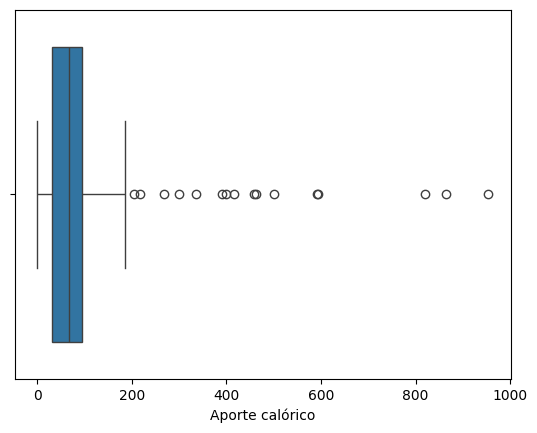

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(data=alimentos, x='aporte_calorico_kcal', orient='h', )
plt.xlabel('Aporte calórico')
plt.show()

- Identifique en el gráfico la mediana, el primer y el tercer cuartil.
- ¿Cómo caracterizaría a la distribución en relación a sus características de simetría?
- En función a lo observado, ¿qué par de medidas de centralidad/posición (media aritmética - mediana) y de dispersión (rango intercuartil - rango - desviación estándar) le parece más adecuada para describir a este conjunto?


In [ ]:
q1 = alimentos['aporte_calorico_kcal'].quantile(0.25)
q2 = alimentos['aporte_calorico_kcal'].median()
q3 = alimentos['aporte_calorico_kcal'].quantile(0.75)

print(f"""
Cuartiles del aporte calórico (kcal):
-------------------------------------
Q1 (percentil 25): {q1} kcal
Q2 (mediana)     : {q2} kcal
Q3 (percentil 75): {q3} kcal
""")



Cuartiles del aporte calórico (kcal):
-------------------------------------
Q1 (percentil 25): 31.5 kcal
Q2 (mediana)     : 66.0 kcal
Q3 (percentil 75): 93.5 kcal



A la distribución la caracterizo como sesgada hacia la derecha.
La mediana y el rango intercuartil parecen los más adecuados para describir este conjunto porque posee grandes valores outliers que afectarían demasiado a la media y al desvío estándar.


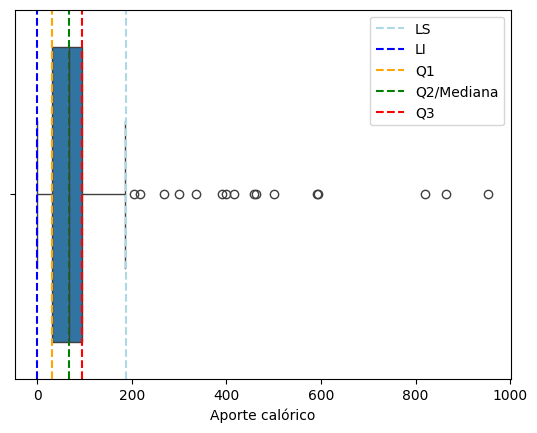

In [ ]:
iqr = q3 - q1
limite_inferior =  q1 - 1.5 * iqr
limite_superior = q3 + 1.5 * iqr

sns.boxplot(data=alimentos, x='aporte_calorico_kcal', orient='h')
plt.axvline(limite_superior, color='lightblue', linestyle='--', label='LS')
plt.axvline(max(limite_inferior, alimentos["aporte_calorico_kcal"].min()),color='blue', linestyle='--', label='LI')

plt.axvline(q1, color='orange', linestyle='--', label='Q1')
plt.axvline(q2, color='green', linestyle='--', label='Q2/Mediana')
plt.axvline(q3, color='red', linestyle='--', label='Q3')
plt.legend()
plt.xlabel('Aporte calórico')
plt.show()


- ¿Existe alguna observación que pueda ser considerada como atípica? En caso de respuesta
afirmativa, ¿cuántas observaciones recibirían esta calificación?

In [ ]:
# iqr y los límites superiores e inferiores están definidos en el bloque de código anterior.
outliers = alimentos[(alimentos['aporte_calorico_kcal'] < limite_inferior) | (alimentos['aporte_calorico_kcal'] > limite_superior)]
# outliers es un dataframe en donde las filas son las filas con valores de "aporte_calorico_kcal" menores al limite inferior o mayores al limite superiores, es decir, los outliers

print(f'Cantidad de outliers: {len(outliers)}')


Cantidad de outliers: 16


4. ¿Qué tipo de alimento presenta la mayor mediana de aporte calórico?

In [ ]:
medianas_aportes_caloricos = alimentos.groupby("tipo_de_alimento")["aporte_calorico_kcal"].median().sort_values(ascending=False)
medianas_aportes_caloricos

,aporte_calorico_kcal
tipo_de_alimento,
elaborada,217.0
fruto seco,113.0
fruta,55.0
animal,49.5
verdura,37.0


In [ ]:
medianas_aportes_caloricos_max = medianas_aportes_caloricos.idxmax()
print(f"El tipo de alimento que presenta la mayor mediana de aporte calórico es \"{medianas_aportes_caloricos_max}\", con un valor de {medianas_aportes_caloricos.loc[medianas_aportes_caloricos_max]:.0f} kcal.")

El tipo de alimento que presenta la mayor mediana de aporte calórico es "elaborada", con un valor de 217 kcal.


5. Realice un boxplot para representar la distribución de los aportes calóricos de alimentos de los siguientes tipos: frutas, verduras y alimentos elaborados.

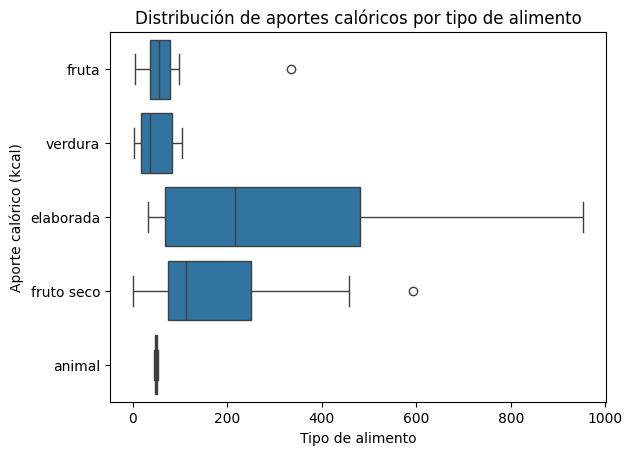

In [ ]:
sns.boxplot(data=alimentos, x="aporte_calorico_kcal", y="tipo_de_alimento")
plt.title("Distribución de aportes calóricos por tipo de alimento")
plt.xlabel("Tipo de alimento")
plt.ylabel("Aporte calórico (kcal)")
plt.show()

- ¿Qué tipo de alimentos presenta valores calóricos más variables y cuál menos variables?
- ¿Qué medida descriptiva utilizó para responder a estas últimas preguntas?

Viendo el gráfico identificamos que el tipo de alimento con menos variabilidad de aporte calórico es "animal" y el que más tiene es "elaborada".
Para realmente saberlo podríamos obtener el rango intercuartil o la desviación estandar.

In [ ]:
stats = alimentos.groupby("tipo_de_alimento")["aporte_calorico_kcal"].agg(["std", "median", "mean", "min", "max", "count"])
stats["IQR"] = alimentos.groupby("tipo_de_alimento")["aporte_calorico_kcal"].quantile(0.75) - alimentos.groupby("tipo_de_alimento")["aporte_calorico_kcal"].quantile(0.25)


stats[["std","IQR"]].sort_values("std",ascending=False)

,std,IQR
tipo_de_alimento,,
elaborada,308.898098,412.0
fruto seco,176.874801,176.5
fruta,59.138770,44.0
verdura,34.535884,65.0
animal,4.949747,3.5


In [ ]:
stats

,std,median,mean,min,max,count,quantile,IQR
tipo_de_alimento,,,,,,,,
animal,4.949747,49.5,49.500000,46,53,2,49.5,3.5
elaborada,308.898098,217.0,315.421053,33,954,19,217.0,412.0
fruta,59.138770,55.0,63.586207,5,336,29,55.0,44.0
fruto seco,176.874801,113.0,186.133333,0,593,15,113.0,176.5
verdura,34.535884,37.0,47.000000,2,104,34,37.0,65.0


In [ ]:
alimentos.groupby("tipo_de_alimento")["aporte_calorico_kcal"].quantile(0.50)

,aporte_calorico_kcal
tipo_de_alimento,
animal,49.5
elaborada,217.0
fruta,55.0
fruto seco,113.0
verdura,37.0


Efectivamente se confirma lo que veíamos en el boxplot. "elaborada" tiene el mayor rango intercuartil y desviación estandar y "animal" los menores

6. Utilizando los datos de los/las pacientes, genere una variable que corresponda a la variación de peso para cada paciente a lo largo del tratamiento (`peso_final_kg` - `peso_inicial_kg`).
- Represente los valores observados de la variable “diferencia de peso” en función del sexo a través de un boxplot.
- ¿Qué medida descriptiva utilizaría para comparar los resultados del tratamiento entre personas de ambos sexos? En función de su respuesta, ¿las personas de qué sexo obtuvieron los mejores resultados para el tratamiento?

In [ ]:
pacientes["variacion_peso"] = pacientes["peso_final_kg"] - pacientes["peso_inicial_kg"]

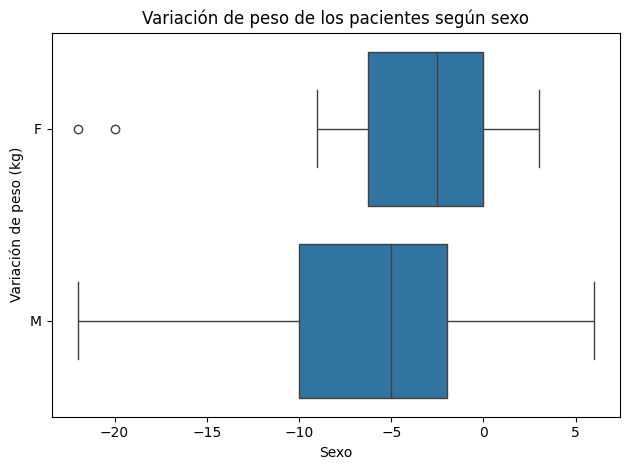

In [ ]:
sns.boxplot(data=pacientes, x="variacion_peso", y="sexo")
plt.title("Variación de peso de los pacientes según sexo")
plt.xlabel("Sexo")
plt.ylabel("Variación de peso (kg)")
plt.tight_layout()
plt.show()

Para comparar los resultados del tratamiento entre personas de diferentes sexos, utilizaría la mediana de la variación de peso, debido a la presencia de valores extremos (outliers) y la asimetría observada en la distribución.

In [ ]:
medianas_variacion_peso_por_sexo = pacientes.groupby("sexo")["variacion_peso"].median()
medianas_variacion_peso_por_sexo

,variacion_peso
sexo,
F,-2.5
M,-5.0


Las personas de sexo masculino obtuvieron mejores resultados, ya que su mediana de variación de peso fue más negativa (-5 en sexo masculino, -2.5 femenino), indicando una mayor pérdida de peso en promedio. Todo esto suponiendo que el objetivo es bajar de peso, lo que imagino que sí porque si no sería un desastre el tratamiento.